# Chapter 3.2: Operations with Fractions

*Mathematics for Psychologists and Computation*

Welcome to Chapter 3.2! Now that we understand what fractions are, let's learn how to perform various mathematical operations with them. These operations are fundamental for analyzing data in psychological research.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300

## Adding and Subtracting Fractions

To add or subtract fractions, we need to have a **common denominator** (the same number on the bottom). 

### Steps for adding/subtracting fractions:

1. Find a common denominator
2. Convert each fraction to an equivalent fraction with that common denominator
3. Add or subtract the numerators
4. Keep the common denominator
5. Simplify the result if possible

**Example**: $\frac{1}{4} + \frac{2}{3}$

1. The least common multiple (LCM) of 4 and 3 is 12
2. Convert $\frac{1}{4}$ to $\frac{3}{12}$ (multiply by $\frac{3}{3}$)
3. Convert $\frac{2}{3}$ to $\frac{8}{12}$ (multiply by $\frac{4}{4}$)
4. Add numerators: $\frac{3}{12} + \frac{8}{12} = \frac{11}{12}$
5. Result: $\frac{11}{12}$ (already in simplified form)

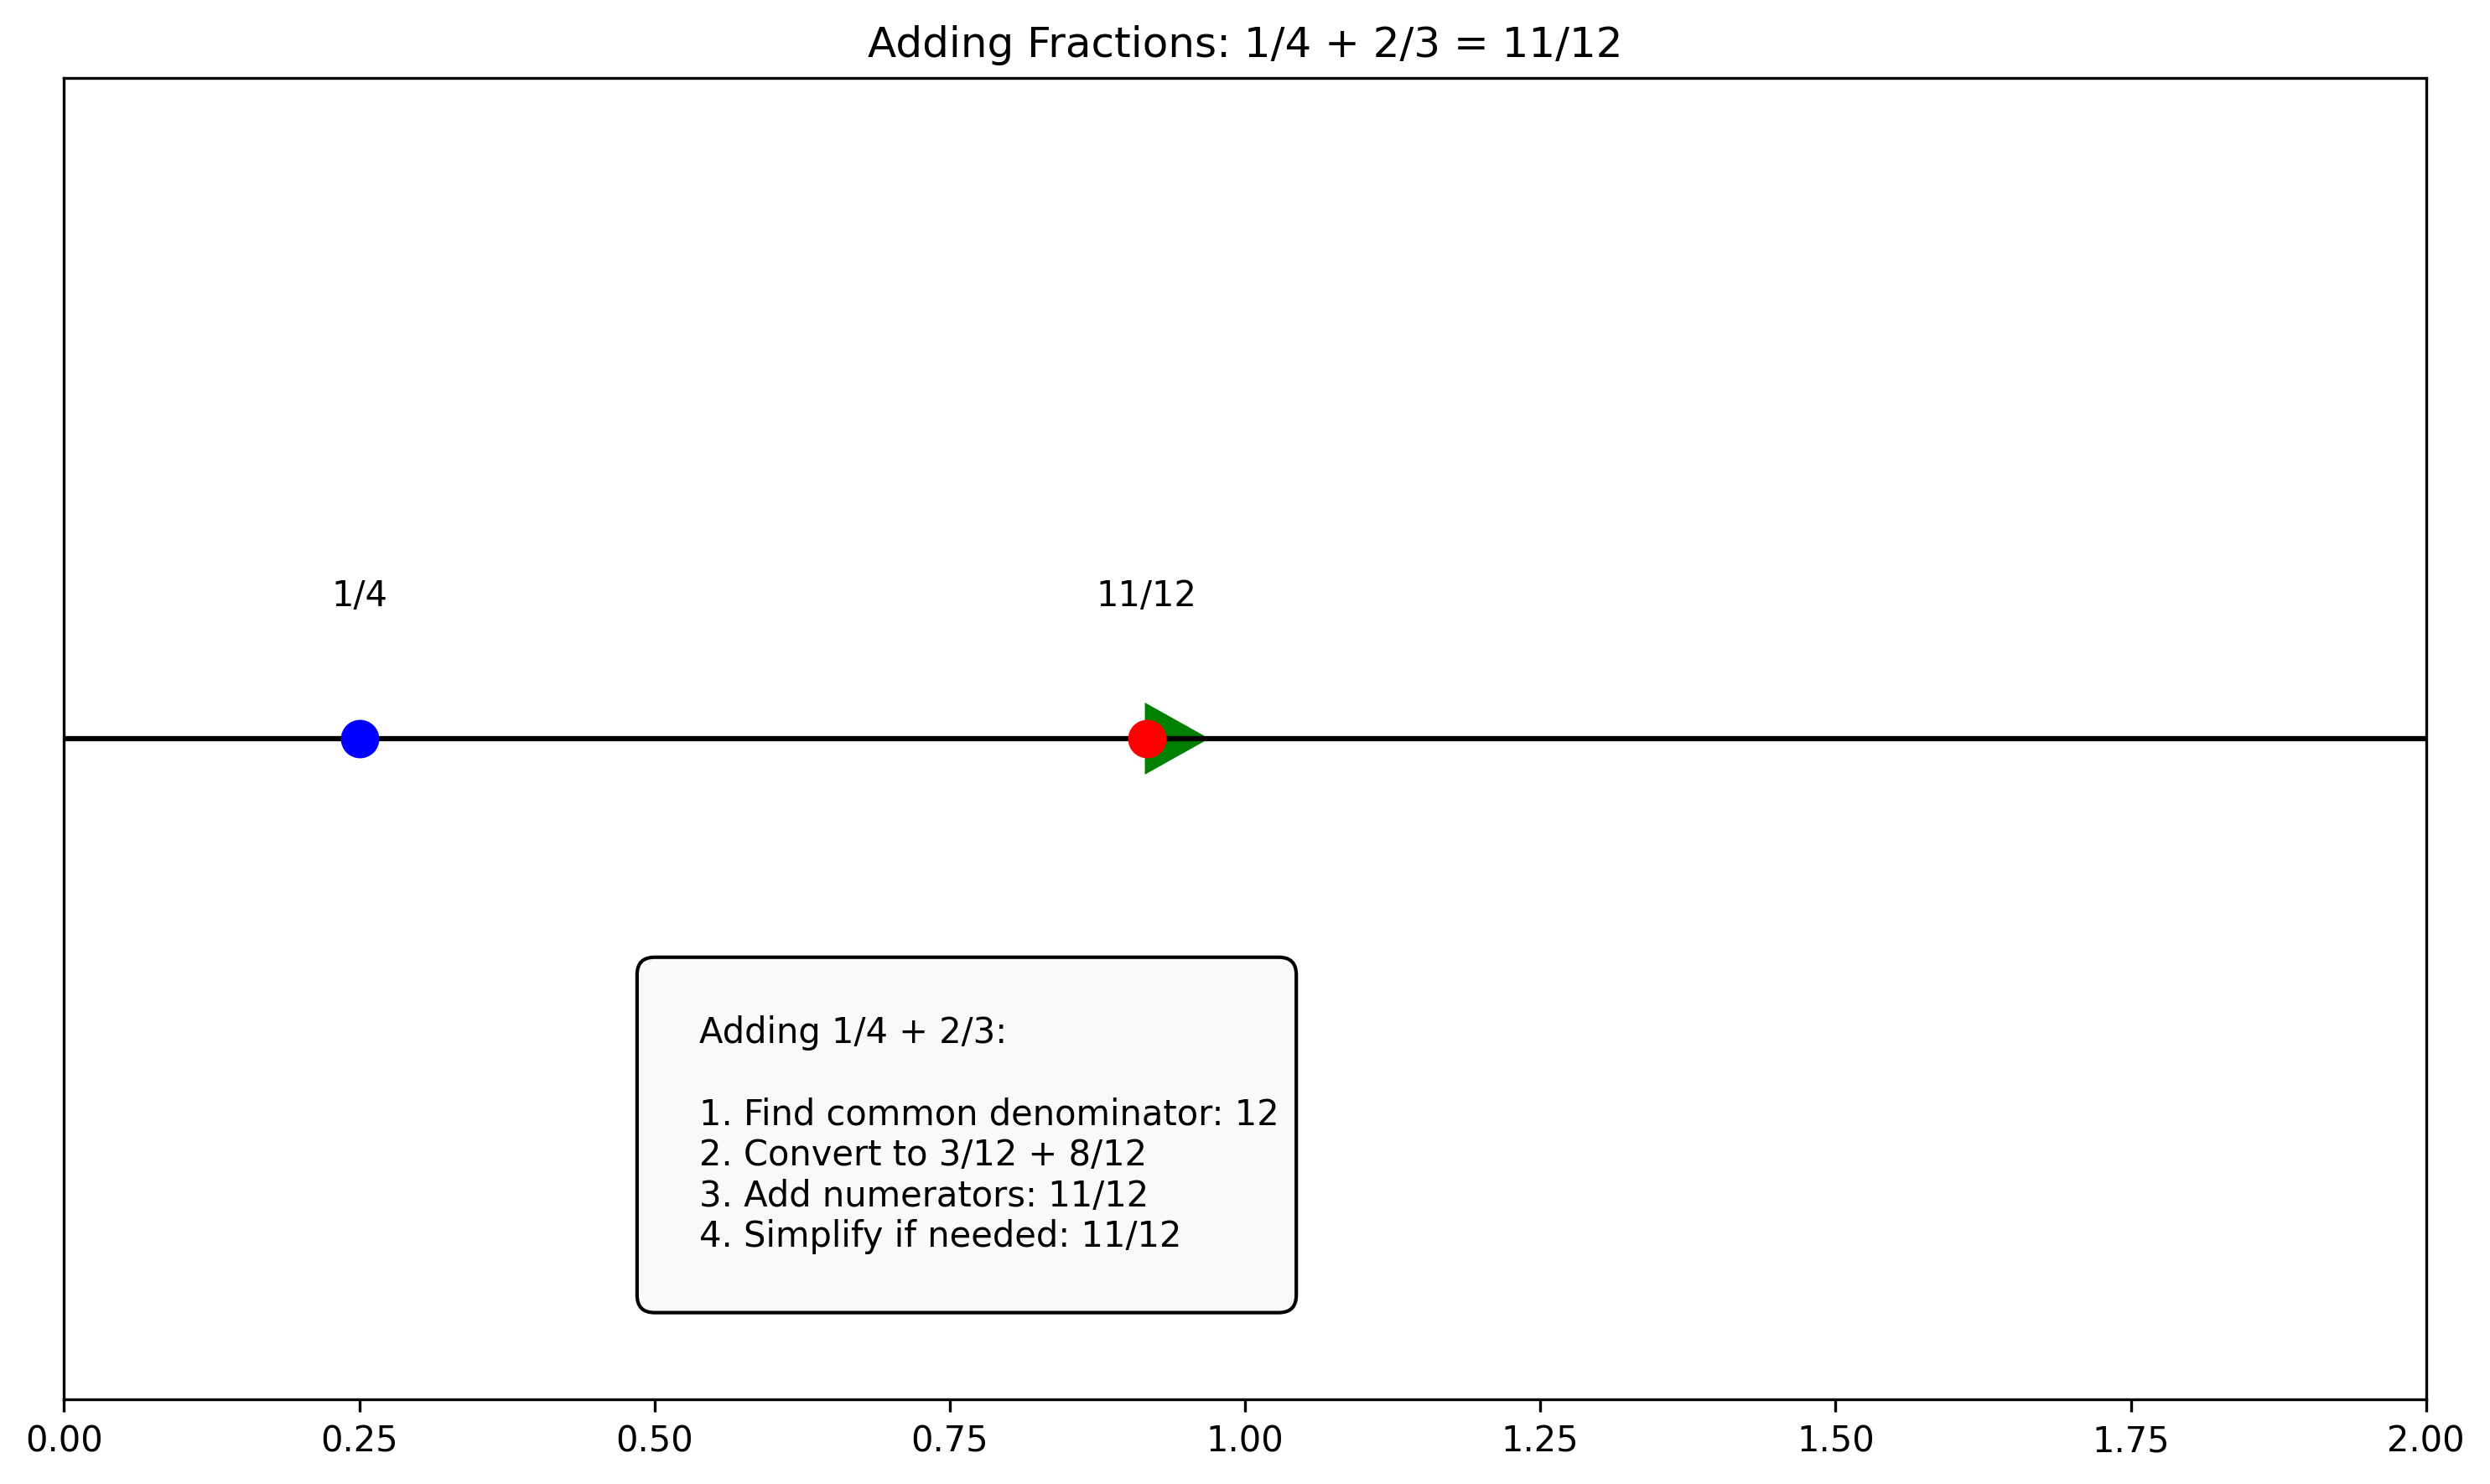

In [2]:
# Create a simple visualization for fraction addition
def visualize_fraction_addition(frac1_num, frac1_den, frac2_num, frac2_den):
    # Calculate result using Python's Fraction class
    f1 = Fraction(frac1_num, frac1_den)
    f2 = Fraction(frac2_num, frac2_den)
    result = f1 + f2
    
    # Find common denominator
    def lcm(a, b):
        return abs(a * b) // np.gcd(a, b)
    
    common_den = lcm(frac1_den, frac2_den)
    
    # Convert fractions
    f1_new_num = frac1_num * (common_den // frac1_den)
    f2_new_num = frac2_num * (common_den // frac2_den)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set up number line
    ax.set_xlim(0, 2)  # Adjust as needed
    ax.set_ylim(0, 1)
    ax.axhline(y=0.5, color='black', linestyle='-')
    
    # Plot fraction points and arrows
    ax.plot(f1.numerator/f1.denominator, 0.5, 'o', markersize=10, color='blue')
    ax.text(f1.numerator/f1.denominator, 0.6, f"{frac1_num}/{frac1_den}", ha='center')
    
    # Add arrow for second fraction
    ax.arrow(f1.numerator/f1.denominator, 0.5, f2.numerator/f2.denominator, 0, 
            head_width=0.05, head_length=0.05, fc='green', ec='green')
    
    # Plot result point
    ax.plot(result.numerator/result.denominator, 0.5, 'o', markersize=10, color='red')
    ax.text(result.numerator/result.denominator, 0.6, f"{result.numerator}/{result.denominator}", ha='center')
    
    # Add annotation with explanation
    explanation = f"""
    Adding {frac1_num}/{frac1_den} + {frac2_num}/{frac2_den}:
    
    1. Find common denominator: {common_den}
    2. Convert to {f1_new_num}/{common_den} + {f2_new_num}/{common_den}
    3. Add numerators: {f1_new_num + f2_new_num}/{common_den}
    4. Simplify if needed: {result.numerator}/{result.denominator}
    """
    
    # Place explanation in a box
    ax.text(0.5, 0.2, explanation, ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="black", lw=1), fontsize=10)
    
    ax.set_title(f"Adding Fractions: {frac1_num}/{frac1_den} + {frac2_num}/{frac2_den} = {result.numerator}/{result.denominator}")
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()

# Example: Visualize 1/4 + 2/3
visualize_fraction_addition(1, 4, 2, 3)

Let's implement simple functions to add and subtract fractions:

In [3]:
def add_fractions(num1, den1, num2, den2):
    # Find the least common multiple (LCM) for the common denominator
    def lcm(a, b):
        return abs(a * b) // np.gcd(a, b)
    
    common_den = lcm(den1, den2)
    
    # Convert to equivalent fractions with common denominator
    num1_converted = num1 * (common_den // den1)
    num2_converted = num2 * (common_den // den2)
    
    # Add the numerators
    result_num = num1_converted + num2_converted
    
    # Simplify the result
    gcd = np.gcd(result_num, common_den)
    result_num = result_num // gcd
    result_den = common_den // gcd
    
    return result_num, result_den

def subtract_fractions(num1, den1, num2, den2):
    # Similar process to addition, but subtract numerators
    def lcm(a, b):
        return abs(a * b) // np.gcd(a, b)
    
    common_den = lcm(den1, den2)
    num1_converted = num1 * (common_den // den1)
    num2_converted = num2 * (common_den // den2)
    result_num = num1_converted - num2_converted
    
    # Simplify
    gcd = np.gcd(abs(result_num), common_den)
    result_num = result_num // gcd
    result_den = common_den // gcd
    
    return result_num, result_den

# Examples
print("Addition examples:")
examples_add = [(1, 4, 3, 8), (2, 3, 3, 5), (5, 6, 1, 4)]
for ex in examples_add:
    num, den = add_fractions(ex[0], ex[1], ex[2], ex[3])
    print(f"{ex[0]}/{ex[1]} + {ex[2]}/{ex[3]} = {num}/{den}")

print("\nSubtraction examples:")
examples_sub = [(5, 6, 1, 3), (7, 8, 1, 4), (2, 3, 1, 6)]
for ex in examples_sub:
    num, den = subtract_fractions(ex[0], ex[1], ex[2], ex[3])
    print(f"{ex[0]}/{ex[1]} - {ex[2]}/{ex[3]} = {num}/{den}")

Addition examples:
1/4 + 3/8 = 5/8
2/3 + 3/5 = 19/15
5/6 + 1/4 = 13/12

Subtraction examples:
5/6 - 1/3 = 1/2
7/8 - 1/4 = 5/8
2/3 - 1/6 = 1/2


## Multiplying Fractions

Multiplying fractions is actually simpler than adding or subtracting them. We don't need to find a common denominator!

To multiply fractions:
1. Multiply the numerators
2. Multiply the denominators
3. Simplify if possible

Formula: $\frac{a}{b} \times \frac{c}{d} = \frac{a \times c}{b \times d}$

**Example**: $\frac{2}{3} \times \frac{5}{7}$

1. Multiply numerators: $2 \times 5 = 10$
2. Multiply denominators: $3 \times 7 = 21$
3. Result: $\frac{10}{21}$ (already in simplest form)

In [4]:
def multiply_fractions(num1, den1, num2, den2):
    # Multiply numerators and denominators
    result_num = num1 * num2
    result_den = den1 * den2
    
    # Simplify if possible
    gcd = np.gcd(result_num, result_den)
    result_num = result_num // gcd
    result_den = result_den // gcd
    
    return result_num, result_den

# Examples
examples_mult = [(2, 3, 5, 7), (1, 4, 2, 3), (3, 5, 10, 11)]
for ex in examples_mult:
    num, den = multiply_fractions(ex[0], ex[1], ex[2], ex[3])
    print(f"{ex[0]}/{ex[1]} × {ex[2]}/{ex[3]} = {num}/{den}")

2/3 × 5/7 = 10/21
1/4 × 2/3 = 1/6
3/5 × 10/11 = 6/11


Let's visualize fraction multiplication using an area model, which is helpful for understanding this operation conceptually:

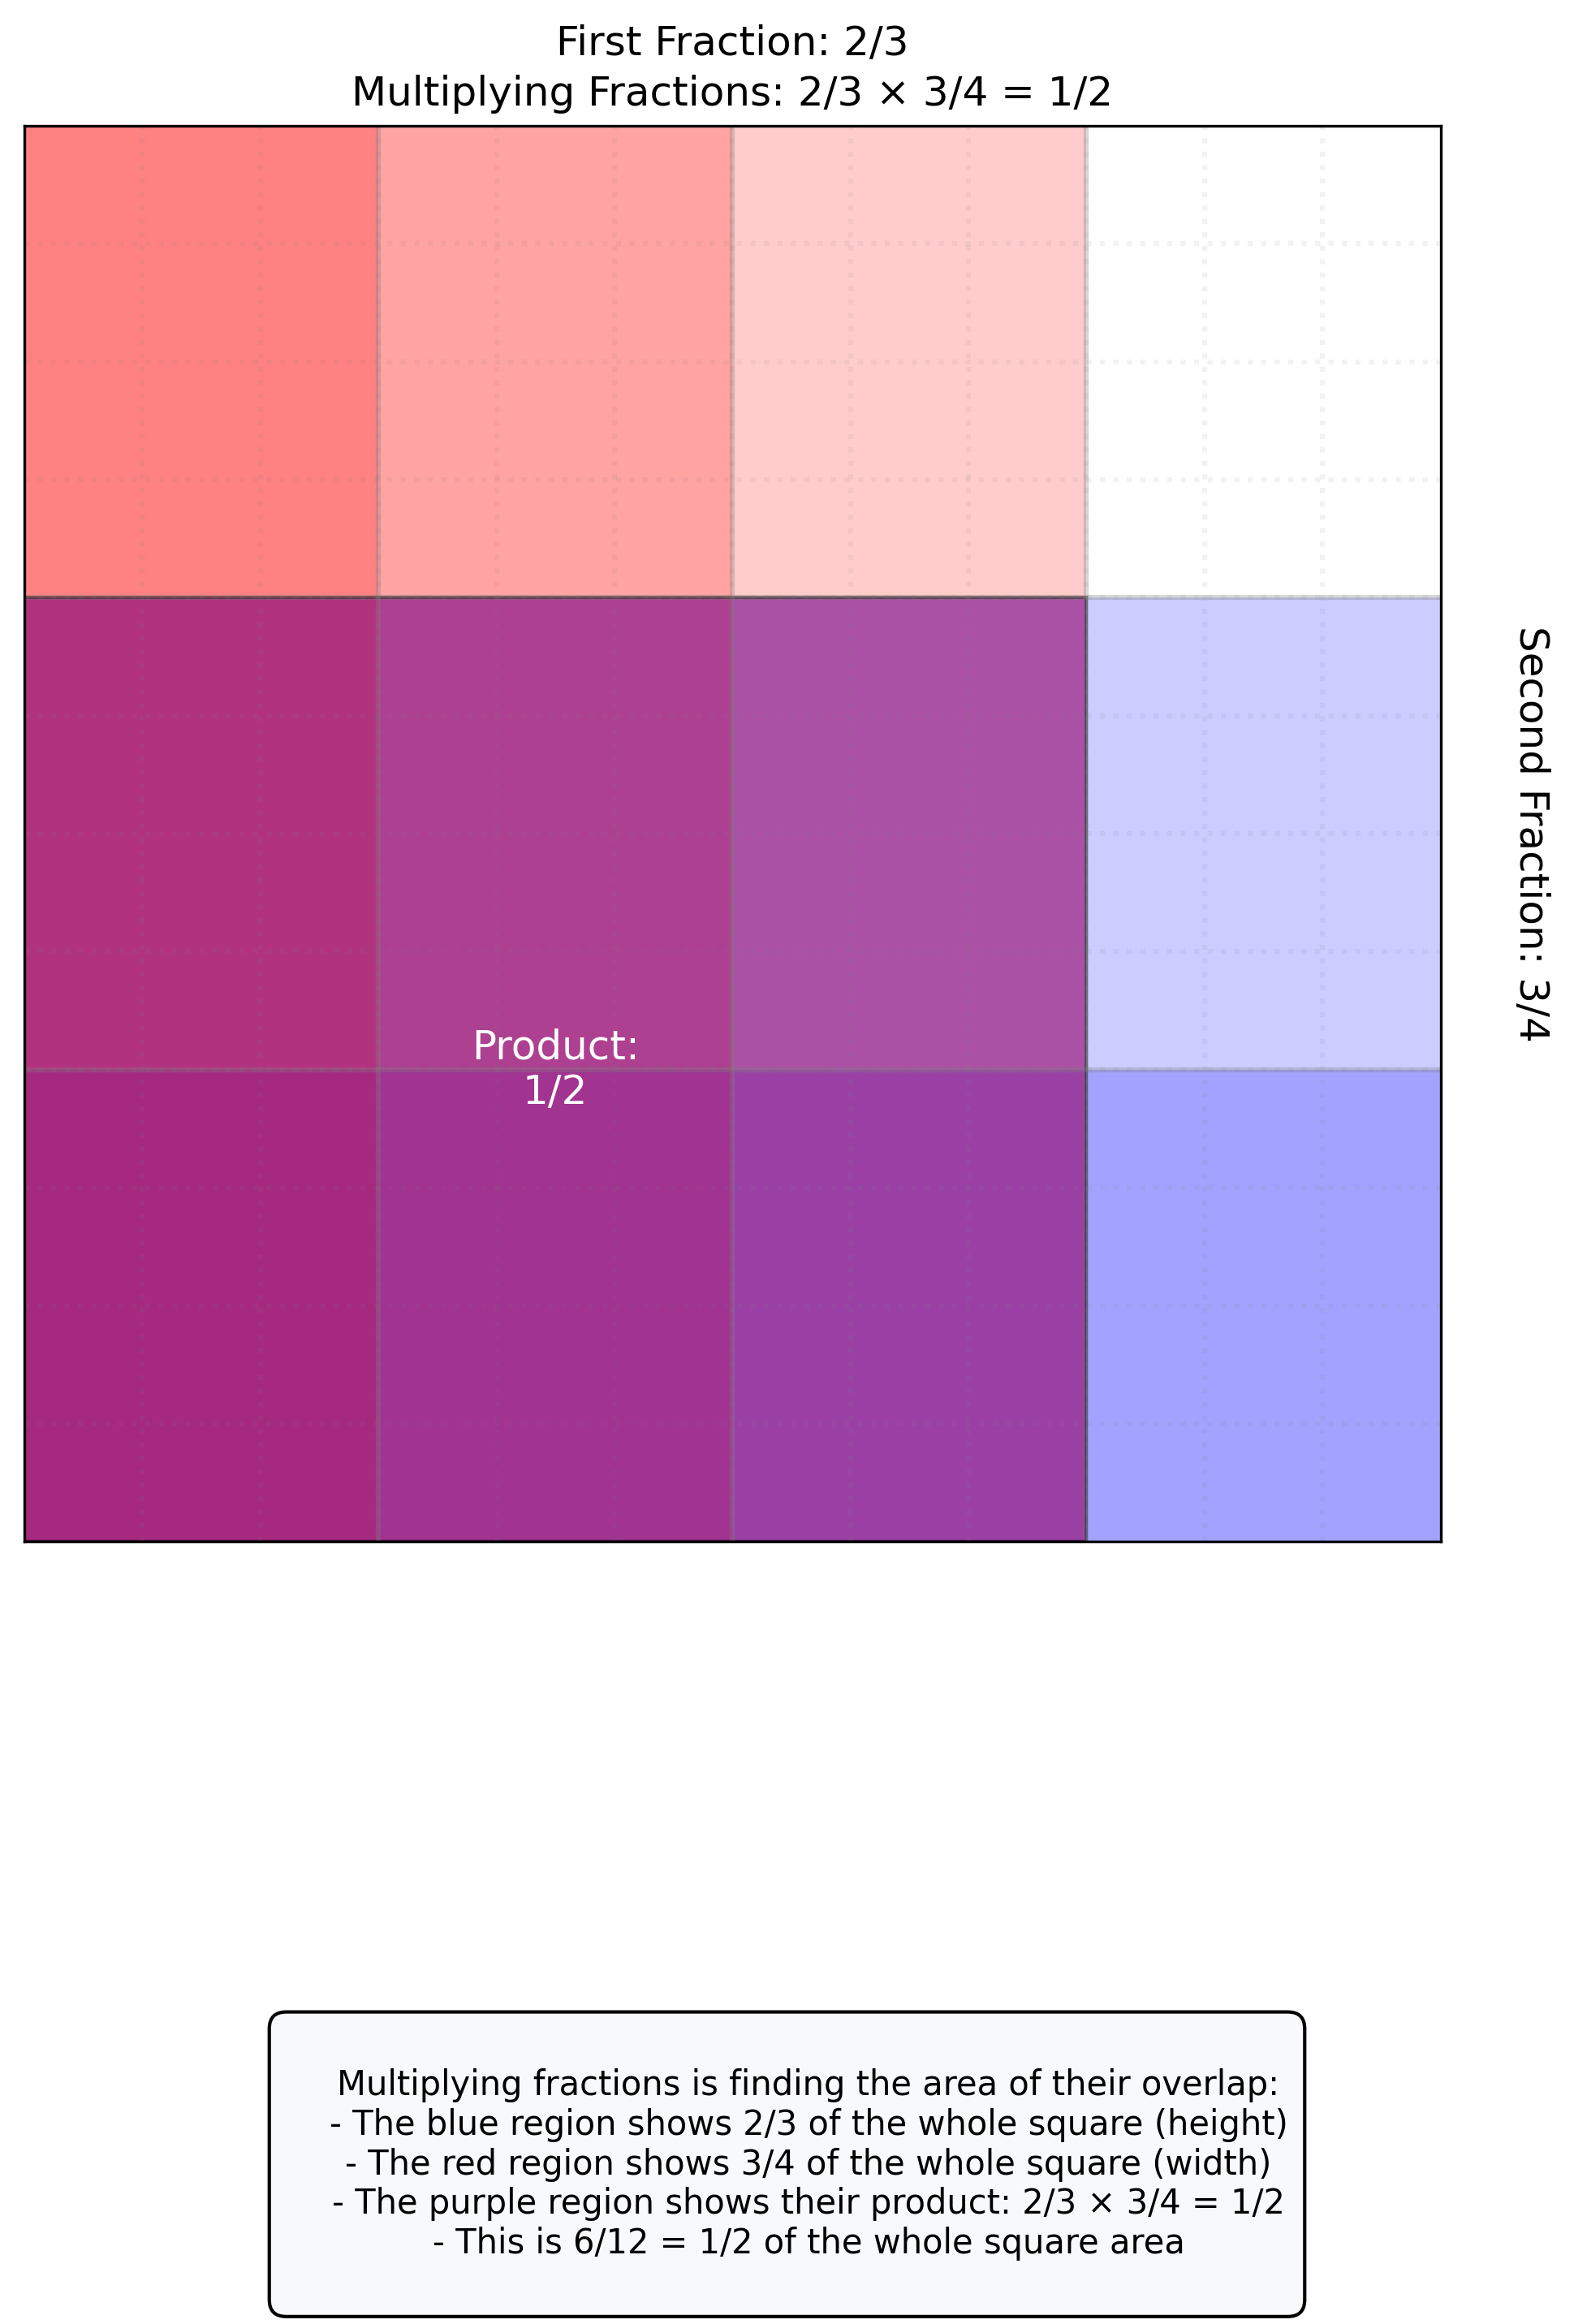

In [5]:
def visualize_fraction_multiplication(num1, den1, num2, den2):
    # Calculate product
    product_num, product_den = multiply_fractions(num1, den1, num2, den2)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    
    # Create grid
    for i in range(1, den1):
        ax.axhline(y=i/den1, color='gray', linestyle='-', alpha=0.3)
    for i in range(1, den2):
        ax.axvline(x=i/den2, color='gray', linestyle='-', alpha=0.3)
    
    # Highlight the area representing the first fraction
    for i in range(num1):
        rect = plt.Rectangle((0, 0), 1, (i+1)/den1, 
                            facecolor='blue', alpha=0.2, edgecolor='none')
        ax.add_patch(rect)
    
    # Highlight the area representing the second fraction
    for i in range(num2):
        rect = plt.Rectangle((0, 0), (i+1)/den2, 1, 
                            facecolor='red', alpha=0.2, edgecolor='none')
        ax.add_patch(rect)
    
    # Highlight the overlapping area (the product)
    rect = plt.Rectangle((0, 0), num2/den2, num1/den1, 
                        facecolor='purple', alpha=0.5, edgecolor='black')
    ax.add_patch(rect)
    
    # Add grid lines for the product denominator (optional)
    for i in range(1, den1*den2):
        ax.axhline(y=i/(den1*den2), color='gray', linestyle=':', alpha=0.1)
        ax.axvline(x=i/(den1*den2), color='gray', linestyle=':', alpha=0.1)
    
    # Add labels
    ax.text(0.5, 1.05, f"First Fraction: {num1}/{den1}", ha='center', fontsize=12)
    ax.text(1.05, 0.5, f"Second Fraction: {num2}/{den2}", va='center', fontsize=12, rotation=-90)
    ax.text(num2/(2*den2), num1/(2*den1), f"Product:\n{product_num}/{product_den}", 
           ha='center', va='center', fontsize=12, color='white')
    
    # Add explanation
    explanation = f"""
    Multiplying fractions is finding the area of their overlap:
    - The blue region shows {num1}/{den1} of the whole square (height)
    - The red region shows {num2}/{den2} of the whole square (width)
    - The purple region shows their product: {num1}/{den1} × {num2}/{den2} = {product_num}/{product_den}
    - This is {num1*num2}/{den1*den2} = {product_num}/{product_den} of the whole square area
    """
    
    plt.figtext(0.5, -0.05, explanation, ha='center', va='top',
                bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="black", lw=1), fontsize=10)
    
    ax.set_title(f"Multiplying Fractions: {num1}/{den1} × {num2}/{den2} = {product_num}/{product_den}")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# Example: Visualize 2/3 × 3/4
visualize_fraction_multiplication(2, 3, 3, 4)

## Dividing Fractions

To divide fractions, we use a simple trick: **multiply by the reciprocal** of the second fraction.

Steps:
1. Take the reciprocal (flip) of the second fraction
2. Multiply the first fraction by this reciprocal
3. Simplify if possible

Formula: $\frac{a}{b} ÷ \frac{c}{d} = \frac{a}{b} \times \frac{d}{c} = \frac{a \times d}{b \times c}$

**Example**: $\frac{3}{4} ÷ \frac{2}{5}$

1. Reciprocal of $\frac{2}{5}$ is $\frac{5}{2}$
2. $\frac{3}{4} \times \frac{5}{2} = \frac{3 \times 5}{4 \times 2} = \frac{15}{8}$
3. Result: $\frac{15}{8}$ (already in simplest form)

In [6]:
def divide_fractions(num1, den1, num2, den2):
    # Multiply by the reciprocal
    return multiply_fractions(num1, den1, den2, num2)

# Examples
examples_div = [(3, 4, 2, 5), (5, 6, 1, 3), (7, 8, 3, 4)]
for ex in examples_div:
    num, den = divide_fractions(ex[0], ex[1], ex[2], ex[3])
    print(f"{ex[0]}/{ex[1]} ÷ {ex[2]}/{ex[3]} = {num}/{den}")

3/4 ÷ 2/5 = 15/8
5/6 ÷ 1/3 = 5/2
7/8 ÷ 3/4 = 7/6


## Application in Psychology: Analyzing Test Performance

Let's use what we've learned to analyze some test performance data from a psychological experiment.

Control group average: 197/250 = 0.79 or 78.8%
Experimental group average: 222/250 = 0.89 or 88.8%
Improvement: 0.10 or 10.0%


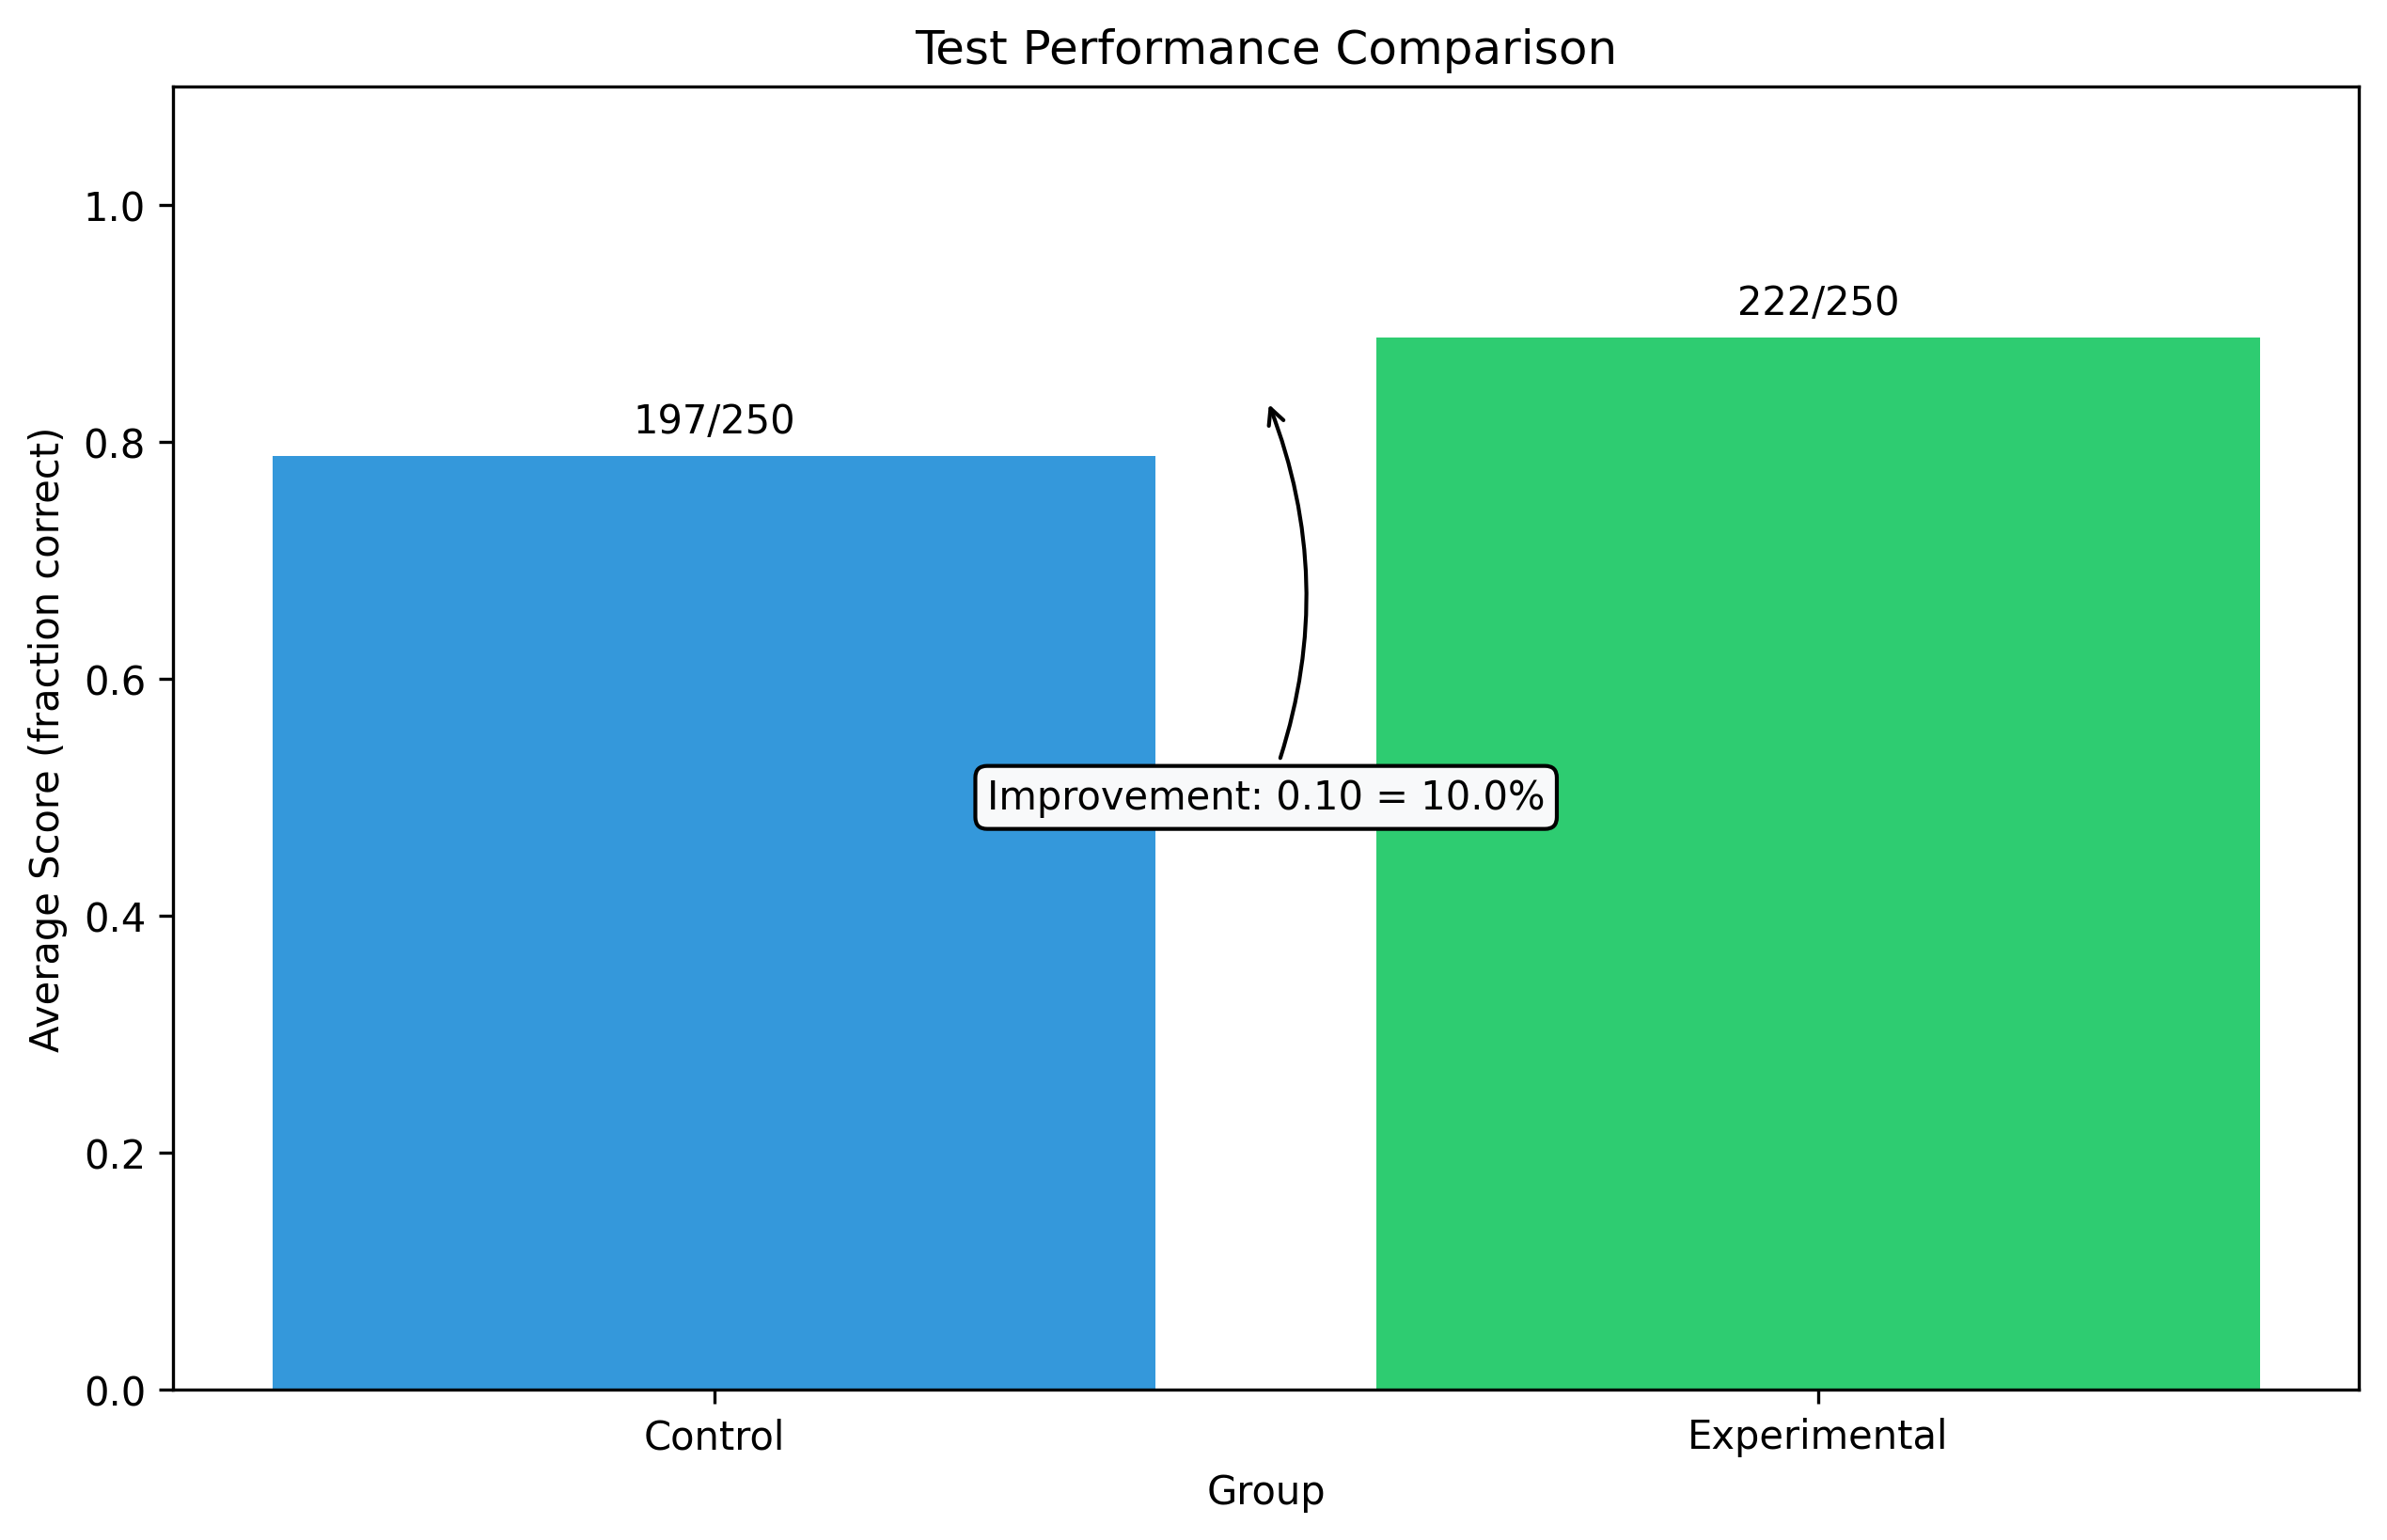

In [7]:
# Sample data: Test scores for different groups
# Format: [correct answers, total questions]

control_group = [
    [18, 25], [20, 25], [22, 25], [19, 25], [21, 25],
    [17, 25], [23, 25], [20, 25], [19, 25], [18, 25]
]

experimental_group = [
    [21, 25], [23, 25], [24, 25], [22, 25], [23, 25],
    [20, 25], [24, 25], [22, 25], [21, 25], [22, 25]
]

# Convert scores to fractions and calculate averages
def calculate_average_score(group_data):
    total_correct = sum(score[0] for score in group_data)
    total_questions = sum(score[1] for score in group_data)
    return total_correct, total_questions

control_correct, control_total = calculate_average_score(control_group)
experimental_correct, experimental_total = calculate_average_score(experimental_group)

# Calculate improvement as a fraction
control_ratio = control_correct / control_total
experimental_ratio = experimental_correct / experimental_total
improvement = experimental_ratio - control_ratio

# Display results
print(f"Control group average: {control_correct}/{control_total} = {control_ratio:.2f} or {control_ratio*100:.1f}%")
print(f"Experimental group average: {experimental_correct}/{experimental_total} = {experimental_ratio:.2f} or {experimental_ratio*100:.1f}%")
print(f"Improvement: {improvement:.2f} or {improvement*100:.1f}%")

# Visualize the results
plt.figure(figsize=(10, 6))
groups = ['Control', 'Experimental']
scores = [control_ratio, experimental_ratio]
bars = plt.bar(groups, scores, color=['#3498db', '#2ecc71'])

# Add fractions above the bars
plt.text(0, control_ratio + 0.02, f"{control_correct}/{control_total}", ha='center')
plt.text(1, experimental_ratio + 0.02, f"{experimental_correct}/{experimental_total}", ha='center')

# Format the plot
plt.ylim(0, 1.1)
plt.xlabel('Group')
plt.ylabel('Average Score (fraction correct)')
plt.title('Test Performance Comparison')

# Add annotation explaining the improvement
plt.annotate(f"Improvement: {improvement:.2f} = {improvement*100:.1f}%", 
             xy=(0.5, (control_ratio + experimental_ratio)/2), 
             xytext=(0.5, 0.5),
             ha='center', va='center',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             bbox=dict(boxstyle="round,pad=0.3", fc="#f8f9fa", ec="black", lw=1))

plt.show()

## Summary

In this chapter, we've learned how to perform basic operations with fractions:

1. **Addition and Subtraction**:
   - Find a common denominator
   - Convert fractions to equivalent forms with this denominator
   - Add/subtract the numerators
   - Simplify the result

2. **Multiplication**:
   - Multiply the numerators
   - Multiply the denominators
   - Simplify the result

3. **Division**:
   - Flip (reciprocate) the second fraction
   - Multiply by this reciprocal
   - Simplify the result

These operations are essential for analyzing and interpreting data in psychological research, from calculating proportions and averages to comparing experimental results.

## Practice Exercises

1. **Basic Operations**: Calculate the following:
   - $\frac{2}{5} + \frac{1}{3}$
   - $\frac{5}{8} - \frac{1}{4}$
   - $\frac{3}{7} \times \frac{2}{9}$
   - $\frac{4}{5} ÷ \frac{2}{3}$

2. **Psychology Application**: In a memory experiment, participants in Group A correctly recalled $\frac{7}{15}$ of the words, while participants in Group B recalled $\frac{9}{15}$. What fraction of words did Group B recall better than Group A?

3. **Mixed Operations**: Solve the following:
   - $\frac{3}{4} + \frac{2}{3} - \frac{1}{6}$
   - $\frac{2}{5} \times \frac{10}{3} ÷ \frac{4}{3}$

4. **Real-world Application**: A psychologist found that $\frac{3}{8}$ of participants showed symptoms of anxiety, while $\frac{2}{5}$ showed symptoms of depression. If $\frac{1}{10}$ of all participants showed symptoms of both conditions, what fraction showed symptoms of either anxiety or depression?

5. **Visualization Challenge**: Use the provided visualization functions to create a visual representation of multiplying $\frac{1}{2}$ by $\frac{2}{3}$. Explain why the result makes sense visually.